For a given number of day and an estimated number of candies (guess), coach rewards home runs with candy to motivate a player during training. Then, we want to predict the maximum distance, using guess (the number of candies) and check in order to do an effective training. From a guess (number of candies), we roll two dice, one for the number of candies and one for the distance the player has to travel, so the outcomes will be random.

In [1]:
#Import necessarry packages 
import matplotlib.pyplot as plt
import random as rd
import numpy as np

In [2]:
#Function to generate the Prediction
def Prediction(nbday, numcandies):
    predictions = []
    velocity_horizontal = 5
    for i in range(nbday):
        numC = numcandies
        t = 0
        Distances = []
        while(  0 < numC):
            dice_candies = rd.randint(1,6)
            dice_distance = rd.randint(1,6)
            numC = numC - dice_candies
            distance = dice_distance*velocity_horizontal
            Distances.append(distance)
        for i in Distances:
            t =  t + i
        predictions.append(t)
    return (predictions)

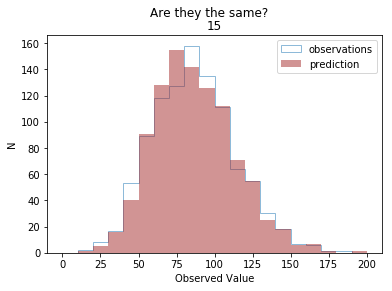

-------------------------------------
hist obs

[  0.   2.   8.  17.  53.  89. 118. 127. 158. 135. 111.  64.  55.  30.
  18.   7.   6.   1.   1.   0.]
[  0.  10.  20.  30.  40.  50.  60.  70.  80.  90. 100. 110. 120. 130.
 140. 150. 160. 170. 180. 190. 200.]
-------------------------------------
hist preds

[  0.   1.   5.  16.  40.  91. 128. 155. 142. 126. 112.  71.  55.  25.
  18.   6.   7.   1.   0.   1.]
[  0.  10.  20.  30.  40.  50.  60.  70.  80.  90. 100. 110. 120. 130.
 140. 150. 160. 170. 180. 190. 200.]


In [3]:
#Plot of the histogram of the observations and the predictions
Ess = [15] # guess for the number of Candies [13,14,15,20] Those are our 
#For each number of Candies, we generate predictions
for i in Ess:
    Preds = Prediction(1000, i)
    
    M = np.loadtxt('coach_and_player_distances.txt')
    num_bins = 20
    plt.suptitle('Are they the same?')
    plt.title(i)
    plt.xlabel('Observed Value')
    plt.ylabel('N')
    n,bins,patches = plt.hist(M, num_bins, range = (0, 200), label = 'observations', histtype='step', alpha=0.5, facecolor = 'blue')
    n2,bins2,patches2 = plt.hist(Preds, num_bins, range =(0, 200), label = 'prediction', alpha=0.5, facecolor = 'brown')
    plt.legend()
    plt.show()
    print("-------------------------------------")
    print("hist obs\n")
    print(n)
    print(bins)
    
    print("-------------------------------------")
    
    print("hist preds\n")
    print(n2)
    print(bins2)
    

Chi2 for bin  8  :  1.8028169014084507
SumChi2(hist) :  18.425037830373473


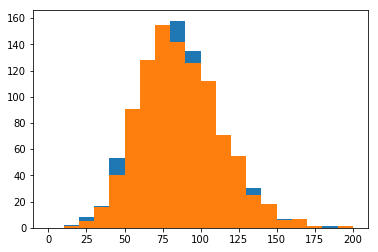

In [4]:
#For the number of candies equal to  15
#The histogram of the predictions is nearly the same as the histogram of the observations
#So, we use the predictions from this number of candies to check the chi-square
#Take each enterance for each bin from the predictions and the observations
dcontent, dedges, dpatches = plt.hist(M, bins = 20 , range =(0, 200));
data_obs = dcontent

pcontent, pedges, ppatches = plt.hist(Preds, bins= 20, range=(0, 200));
data_pred = pcontent

# calculating chi-squared
#
# calculate chi-squared for the third bin in the distribution
# as a reminder, the equation is :
#
# chi2bin = [(Pi - Oi)/Err(Pi)]**2
#
# now, the Err(Pi) can be obtained by taking the RMS of the distribution of the values of
# the predicted bin content in this single bin (i.e. the RMS of the blue distribution 
# just above this)
# 
# however, since this is a counting experiment and so it is a good assumption (we can show it later)
# that the error on Pi comes from poisson distribution : sqrt(Pi)
#
ibin = 8
chi2_bin = ((data_obs[ibin]-data_pred[ibin])/data_pred[ibin]**0.5)**2

print("Chi2 for bin ",ibin," : ",chi2_bin)

sum_chi2 = 0

for i in range(len(data_obs)):
    
    if data_pred[i]==0:
        continue
    chi2_bin = ((data_obs[i]-data_pred[i])/data_pred[i]**0.5)**2
    sum_chi2 += chi2_bin
    
print("SumChi2(hist) : ",sum_chi2)

 The values that we get for the Chi2 for a bin and the sum of the Chi2 of all bins are low. Thus, our guess "Number of Candies = 15" is reasonable. So, the estimate number of candies to provide is 15